In [2]:
import numpy as np
import matplotlib.pyplot as plt


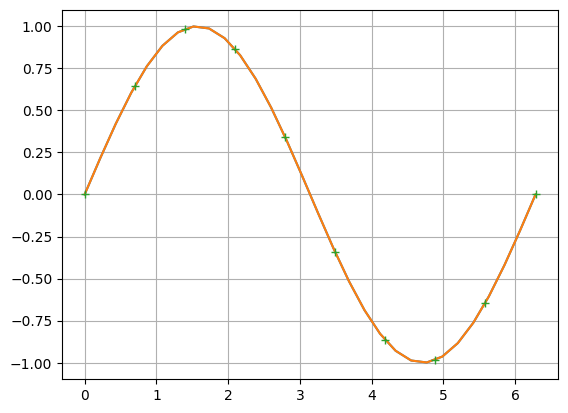

In [3]:
def Dn(i,k,Xn, Yn):
    if i+k >= len(Xn):
        return 0
    elif k == 0:
        return Yn[i]
    else:
        return (Dn(i+1, k-1, Xn, Yn)-Dn(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

def diferencia_dividida(x,nodes, images):
    result = images[0]
    prod = 1
    for k in range(1, len(nodes)):
        D = Dn(0,k ,nodes,images)
        prod *= (x - nodes[k-1])
        result += D*prod
    return result

nodes = np.linspace(0, 2*np.pi, 10)
images = np.sin(nodes)


x = np.linspace(0,2* np.pi, 30)
values = []
for value in x:
    values.append(diferencia_dividida(value,nodes,images))

plt.plot(x,values)
plt.plot(x,np.sin(x))
plt.plot(nodes, images, '+')
plt.grid()